# Arduino Analog Example

This example shows how to read out analog values on Arduino analog pins. Users can either wire the test pins, or use the PYNQ shield. 

For this notebook, a PYNQ Arduino shield is used. The grove joystick is connected to group A1, while a grove potentiometer is connected to group A4 on this shield.

In [1]:
# Make sure the base overlay is loaded
from pynq import Overlay
base = Overlay("base.bit")

## 1. Instantiate individual analog controller
In this example, connect the grove joystick to group A1.

In [2]:
from pynq.lib.arduino import Arduino_Analog
from pynq.lib.arduino import ARDUINO_GROVE_A1
from pynq.lib.arduino import ARDUINO_GROVE_A4

base.arduino.load(Arduino_Analog,ARDUINO_GROVE_A1)
analog1 = base.arduino

## 2. Read voltage value out

Read out the individual analog voltage values. The voltage (volts) is in the range of [0.0, 3.3].

In [3]:
analog1.read()

[0.6634, 0.6575]

## 3. Read raw value out

Read out the individual raw values. Since the XADC is 16-bit, the raw value is in the range of [0, 65535].

In [4]:
analog1.read_raw()[0]

13055

## 4. Logging multiple sample values

### Step 1: Starting logging once every 100 milliseconds
Once the interval is set, users can change the analog values.

For example, if the grove potentiometer is used, move the slider back and forth slowly.
If the joy stick is used, rotate the joy stick slowly.

In [5]:
from time import sleep

analog1.set_log_interval_ms(100)
analog1.start_log()

### Step 2: Get the log
Stop and get the log whenever is done.

The log is a nested list, where each list inside log records the samples for one channel.

In [6]:
log1 = analog1.get_log()

### Step 3. Plot values over time
The voltage values can be logged and displayed.

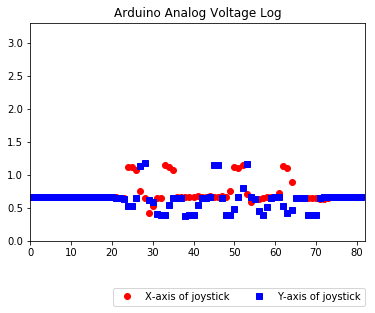

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(range(len(log1[0])), log1[0], 
                  'ro', label="X-axis of joystick")
line2, = plt.plot(range(len(log1[1])), log1[1], 
                  'bs', label="Y-axis of joystick")
plt.title('Arduino Analog Voltage Log')
plt.axis([0, len(log1[0]), 0.0, 3.3])
plt.legend(loc=4,bbox_to_anchor=(1, -0.3),
           ncol=2, borderaxespad=0.,
           handler_map={line1: HandlerLine2D(numpoints=1),
                        line2: HandlerLine2D(numpoints=1)})
plt.show()

## 5. Logging multiple devices
We can also repeat the above steps to track multiple analog devices.
In this example: 
    * connect the grove joystick to group A1.
    * connect the grove potentiometer to group A4.

Both analog devices will be monitored.

### Step 1: Starting logging once every 100 milliseconds
Once the interval is set, users can change the analog values by:
    * rotating the joy stick.
    * moving the slider back and forth.

In [8]:
base.arduino.load(Arduino_Analog,[0,1,4])
analog2 = base.arduino
analog2.set_log_interval_ms(100)
analog2.start_log()

### Step 2: Get the log
Stop and get the log whenever is done.

The log is a nested list, where each list inside log records the samples for one channel.

In [9]:
log2 = analog2.get_log()

### Step 3. Plot values over time
The voltage values can be logged and displayed.

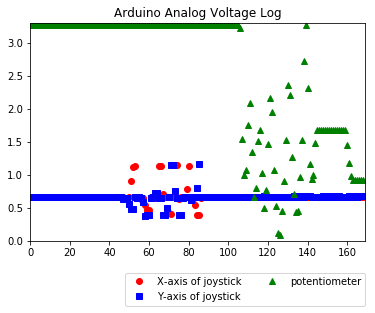

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(range(len(log2[0])), log2[0], 
                  'ro', label="X-axis of joystick")
line2, = plt.plot(range(len(log2[1])), log2[1], 
                  'bs', label="Y-axis of joystick")
line3, = plt.plot(range(len(log2[2])), log2[2], 
                  'g^', label="potentiometer")
plt.title('Arduino Analog Voltage Log')
plt.axis([0, len(log2[0]), 0.0, 3.3])
plt.legend(loc=4,bbox_to_anchor=(1, -0.3),
           ncol=2, borderaxespad=0.,
           handler_map={line1: HandlerLine2D(numpoints=1),
                        line2: HandlerLine2D(numpoints=1),
                        line3: HandlerLine2D(numpoints=1)})
plt.show()